In [190]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colormaps

## DATA RAPRESENTETION

In [191]:
wine_dataframe = pd.read_csv('restore_winedata.csv')
wine_dataframe.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.51,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.18,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [192]:
wine_dataframe.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [193]:
#wdf=wine_dataframe.copy()
#scaler = StandardScaler()
# Seleziona tutte le colonne tranne quality
#cols_to_standardize = wdf.columns.difference(['quality'])
# Calcola la z-score per le colonne selezionate
#wdf[cols_to_standardize] = scaler.fit_transform(wdf[cols_to_standardize])


In [194]:
wine_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


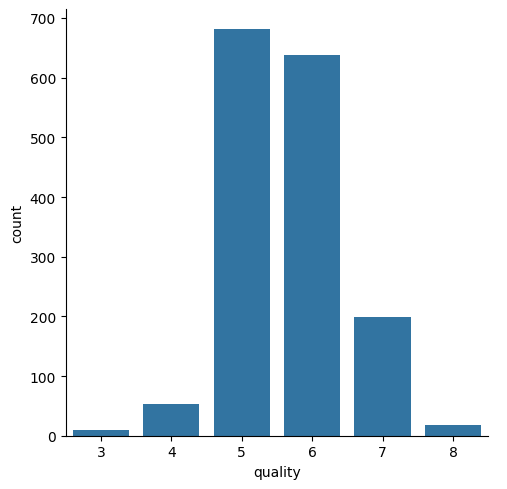

In [195]:
sns.catplot(x='quality',data=wine_dataframe, kind='count')  #counting and rappresenting different label
plt.show()

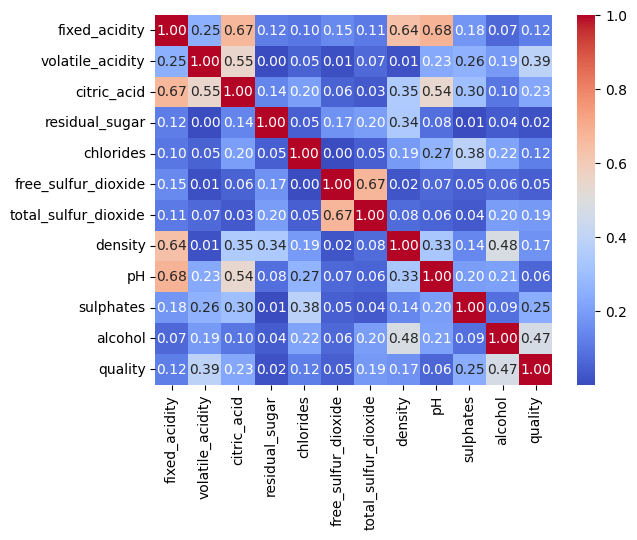

In [196]:
corr_matrix = wine_dataframe.corr().abs()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [197]:
wine_feature=corr_matrix['quality']
wine_feature.drop(['quality'], inplace=True)

In [198]:
moderate_corr=[]
weak_corr=[]
no_corr=[]

for i in range(len(wine_feature)):
    if wine_feature.iloc[i] > 0.389 :
        moderate_corr.append(wine_feature.index[i])
    elif wine_feature.iloc[i] > 0.189 :
        weak_corr.append(wine_feature.index[i])
    else:
        no_corr.append(wine_feature.index[i])



In [199]:
print('Feature with moderate correlation with quality:',moderate_corr)
print('Feature with weak correlation with quality:',weak_corr)
print('Feature with no correlation with quality:',no_corr)

Feature with moderate correlation with quality: ['volatile_acidity', 'alcohol']
Feature with weak correlation with quality: ['citric_acid', 'sulphates']
Feature with no correlation with quality: ['fixed_acidity', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH']


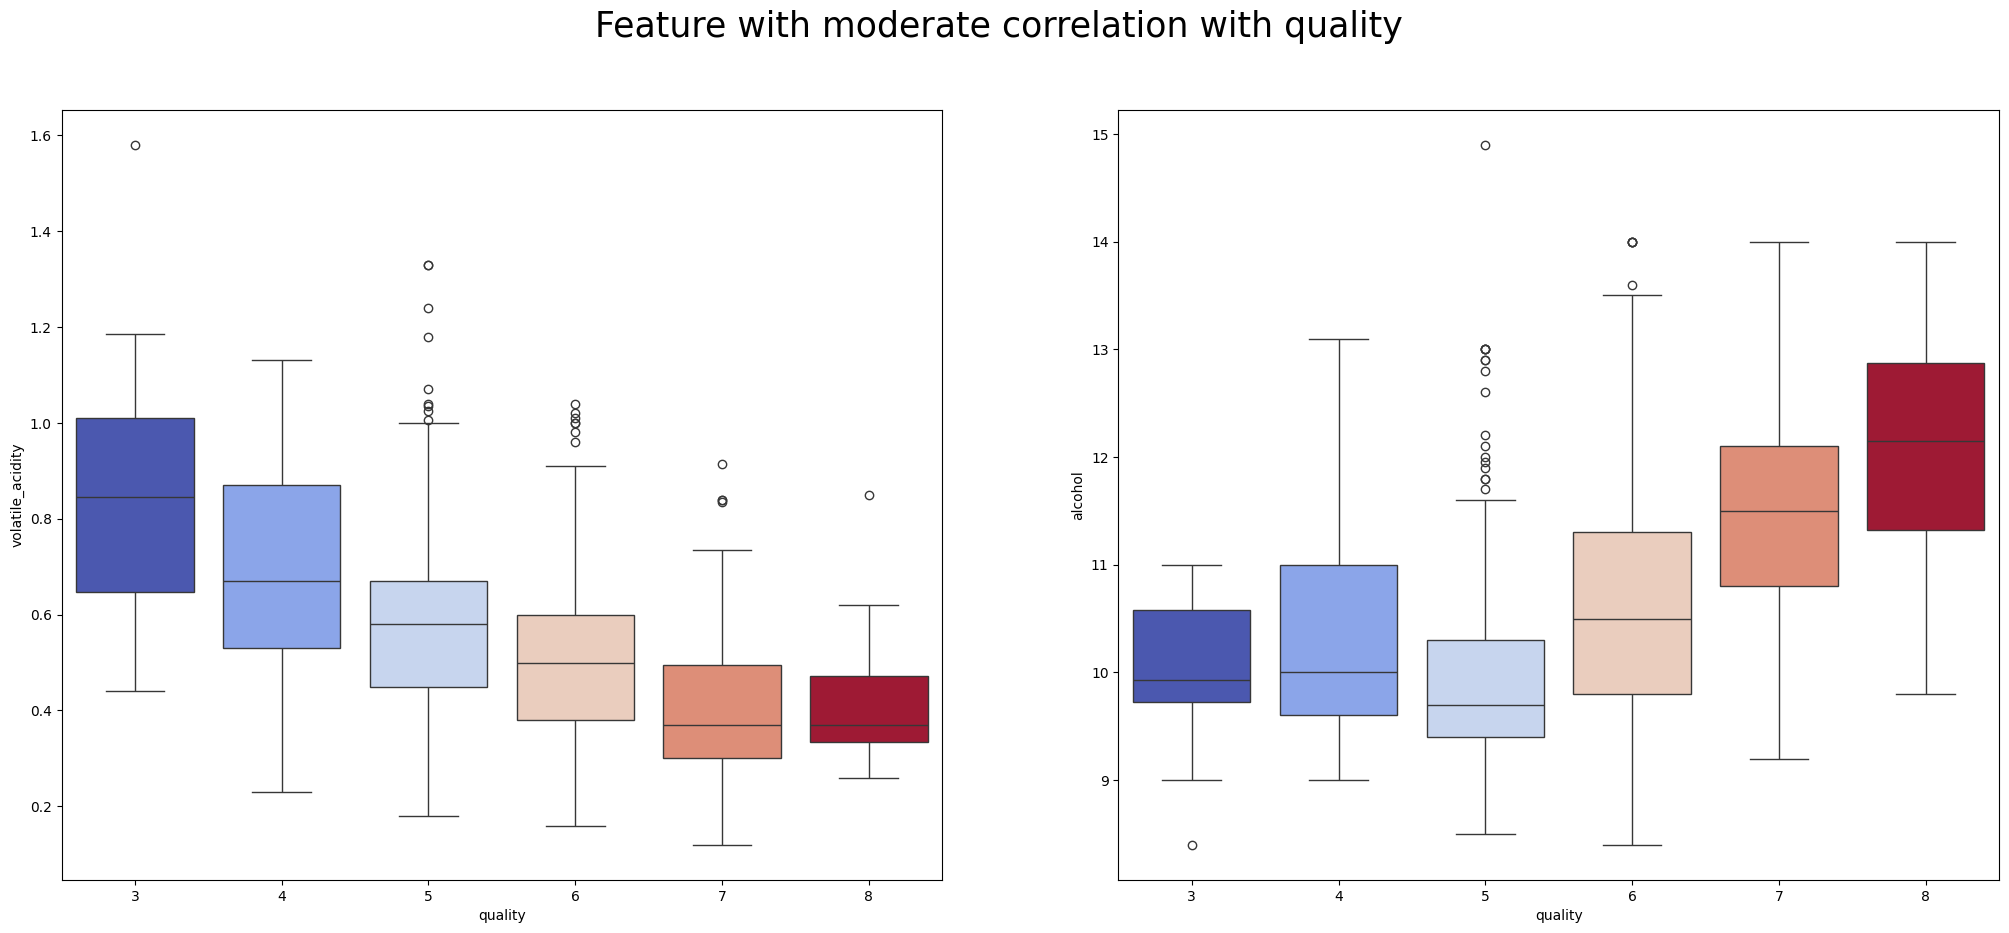

In [200]:
centroidi_df=pd.DataFrame()
fig, ax = plt.subplots(1,2,figsize =(25,10))
for i in range(len(moderate_corr)):
    sns.boxplot(x='quality', y=moderate_corr[i], hue='quality', data = wine_dataframe, ax=ax[i], palette = 'coolwarm', legend=False)
    centroidi_df[moderate_corr[i]] =  wine_dataframe.groupby('quality')[moderate_corr[i]].mean()
fig.suptitle('Feature with moderate correlation with quality', fontsize=25)
plt.show()

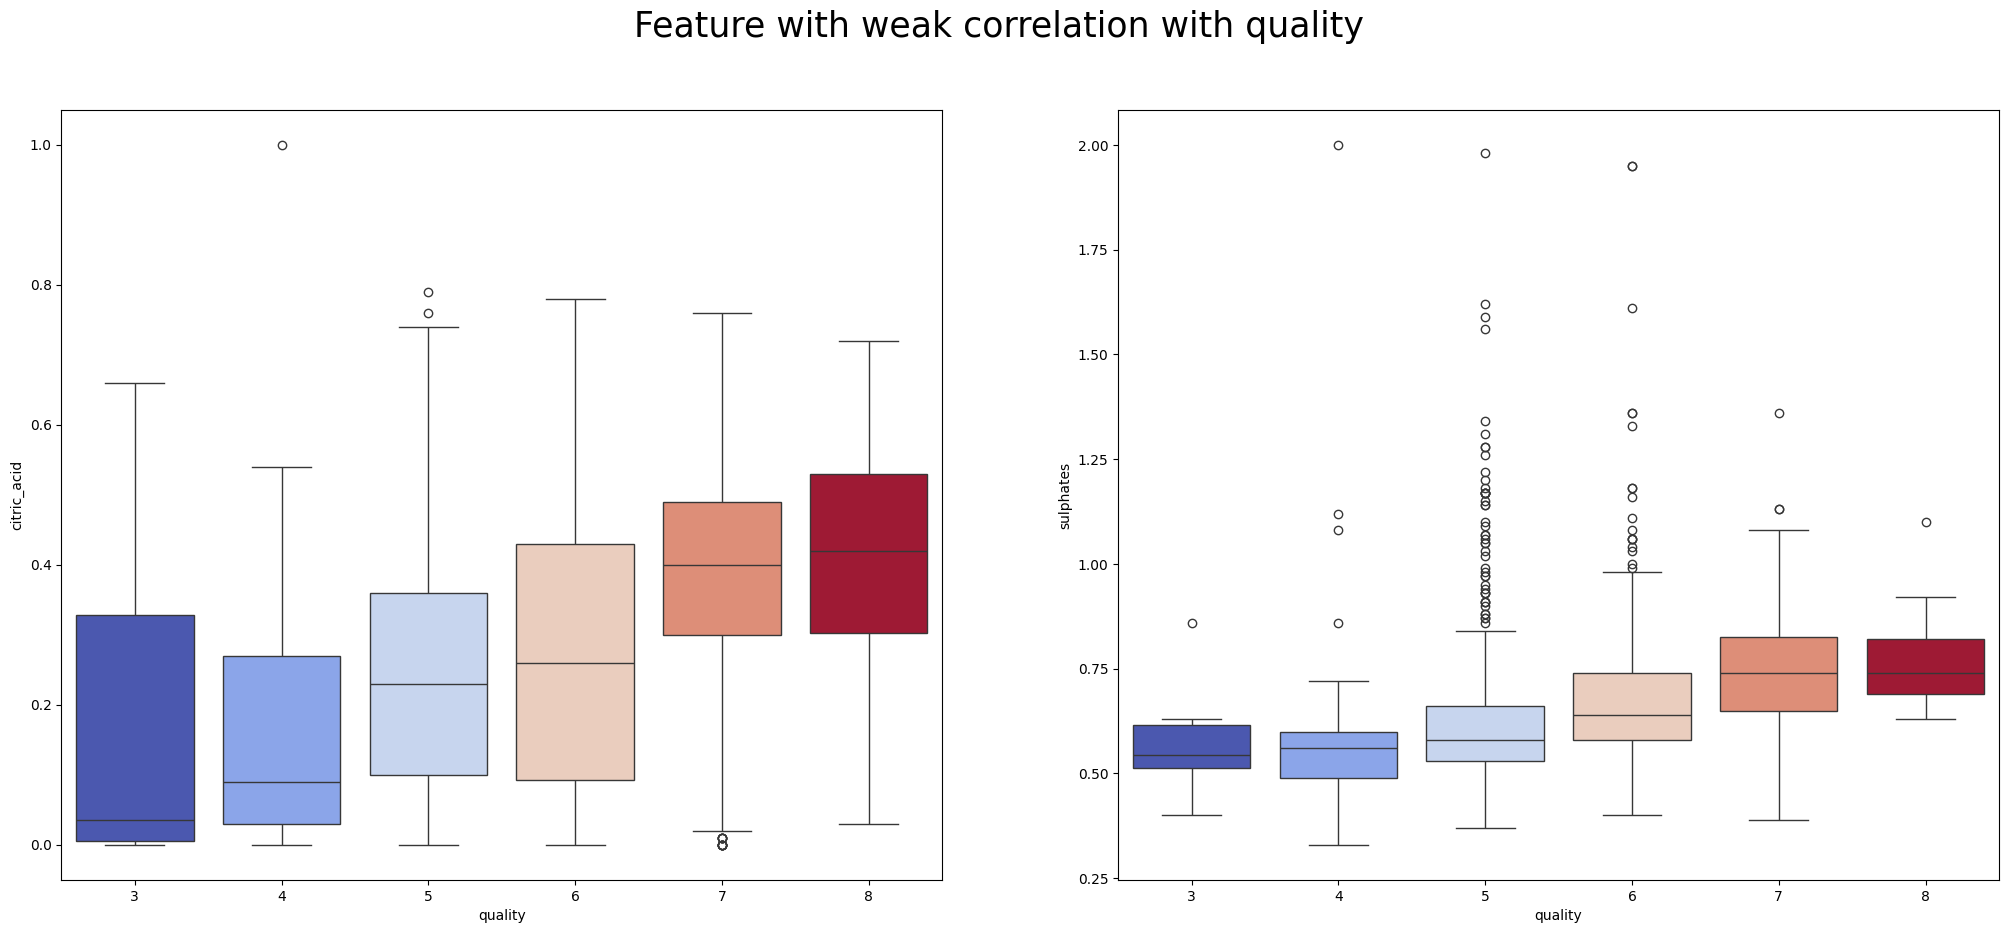

In [201]:
fig, ax = plt.subplots(1,2,figsize =(25,10))
for i in range(len(weak_corr)):
    sns.boxplot(x='quality', y=weak_corr[i], hue='quality', data = wine_dataframe, ax=ax[i], palette = 'coolwarm', legend=False)
    centroidi_df[weak_corr[i]] =  wine_dataframe.groupby('quality')[weak_corr[i]].mean()
fig.suptitle('Feature with weak correlation with quality', fontsize=25)
plt.show()

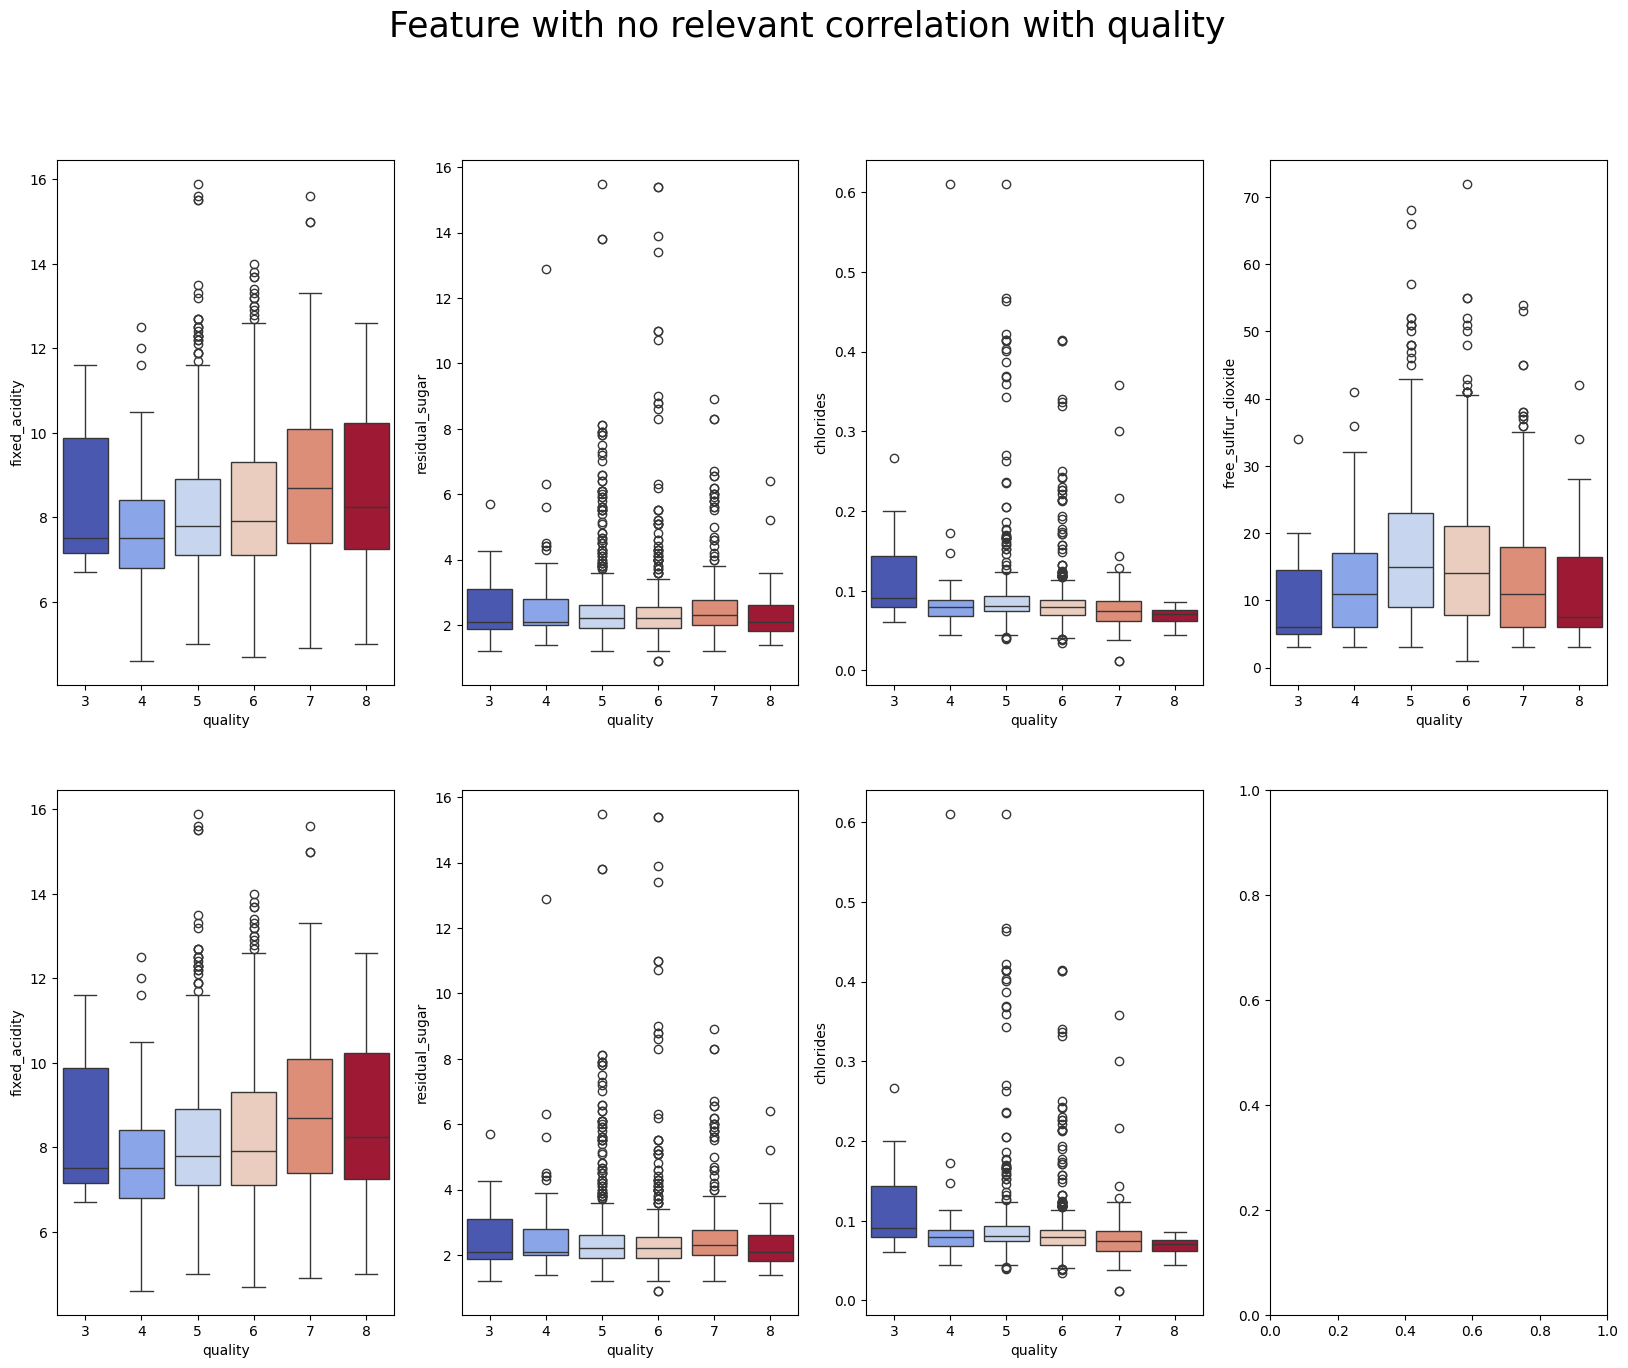

In [202]:
fig, ax = plt.subplots(2,4,figsize=(20,15))
a=0
for i in range(len(no_corr)):
    j=i
    if i >3:
        a=1
        i=i-4
    sns.boxplot(x='quality', y=no_corr[i], hue='quality', data = wine_dataframe, ax=ax[a,i], palette = 'coolwarm', legend=False)
    centroidi_df[no_corr[j]] =  wine_dataframe.groupby('quality')[no_corr[j]].mean()

fig.suptitle('Feature with no relevant correlation with quality', fontsize=25)
plt.show()

## CLASSIFICATOR

In [203]:
all_feature_df=wine_dataframe.drop(columns=['quality'])
relevant_feature_df=wine_dataframe.drop(columns=['quality','fixed_acidity','residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH'])
y_true=wine_dataframe.loc[:,'quality']
accuracy_dict={}

In [204]:
#Data per test e train (80%train)
x_train_rel,x_test_rel,y_train_rel,y_test_rel=train_test_split(relevant_feature_df,y_true,test_size=0.2,random_state=10)
X_train, X_test, Y_train, Y_test = train_test_split(all_feature_df, y_true, test_size=0.2, random_state=10)

# Standardizzazione di test/train con le relevant feature
scaler = StandardScaler()
x_train_scaled_rel = scaler.fit_transform(x_train_rel)
x_test_scaled_rel = scaler.transform(x_test_rel)

# Standardizzazione di test/train con tutte le feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [205]:
#Kmeans con relevant feature e centroidi casuali
k=6
kmeans = KMeans(n_clusters=k, random_state=18)
kmeans.fit(x_train_rel)

y_pred= kmeans.predict(x_test_rel)+3
accuracy=accuracy_score(y_test_rel,y_pred)
silhouette = silhouette_score(x_test_rel, y_pred)

print('Silhouette score:',silhouette,'\nAccuracy score:',accuracy)
accuracy_dict['kmeans_rand'] = accuracy

Silhouette score: 0.341225960208872 
Accuracy score: 0.209375


In [206]:
#Kmeans con solo relevant feature e con centroidi inizializzati alla media delle feature 
centroidi_array=centroidi_df.to_numpy()
centroidi_array_relevant=centroidi_df.drop(columns=['fixed_acidity', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH']).to_numpy()
kmeans = KMeans(n_clusters=k, init=centroidi_array_relevant)
kmeans.fit(x_train_rel)

y_pred = kmeans.predict(x_test_rel)+3
accuracy= accuracy_score(y_test_rel,y_pred)
silhouette = silhouette_score(x_test_rel, y_pred)


print('Silhouette score:',silhouette,'\nAccuracy score:',accuracy)
accuracy_dict['kmeans_centr']=accuracy

Silhouette score: 0.34214057296689704 
Accuracy score: 0.2375


In [207]:
'''#Kmeans con tutte le feature e centroidi casuali
x_train,x_test,y_train,y_test=train_test_split(all_feature_df,y_true,test_size=0.2,random_state=1)

kmeans = KMeans(n_clusters=k, random_state=10)
kmeans.fit(x_train)

y_pred = kmeans.predict(x_test) + 3
score=accuracy_score(y_test,y_pred)
silhouette = silhouette_score(x_test, y_pred)

print('Silhouette score:',silhouette,'\nAccuracy score:',score)'''

"#Kmeans con tutte le feature e centroidi casuali\nx_train,x_test,y_train,y_test=train_test_split(all_feature_df,y_true,test_size=0.2,random_state=1)\n\nkmeans = KMeans(n_clusters=k, random_state=10)\nkmeans.fit(x_train)\n\ny_pred = kmeans.predict(x_test) + 3\nscore=accuracy_score(y_test,y_pred)\nsilhouette = silhouette_score(x_test, y_pred)\n\nprint('Silhouette score:',silhouette,'\nAccuracy score:',score)"

In [208]:
'''#Kmeans con tutte le feature e centroidi inizializzati alle medie
kmeans = KMeans(n_clusters=k, init=centroidi_array)
kmeans.fit(x_train)

y_pred = kmeans.predict(x_test) + 3

# Valutazione delle prestazioni del modello
score=accuracy_score(y_test,y_pred)
silhouette = silhouette_score(x_test, y_pred)
print('Silhouette score:',silhouette,'\nAccuracy score:',score)'''

"#Kmeans con tutte le feature e centroidi inizializzati alle medie\nkmeans = KMeans(n_clusters=k, init=centroidi_array)\nkmeans.fit(x_train)\n\ny_pred = kmeans.predict(x_test) + 3\n\n# Valutazione delle prestazioni del modello\nscore=accuracy_score(y_test,y_pred)\nsilhouette = silhouette_score(x_test, y_pred)\nprint('Silhouette score:',silhouette,'\nAccuracy score:',score)"

In [209]:
# RandomForestClassifier con relevant_feature
rf_model = RandomForestClassifier(n_estimators=100, random_state=20)
rf_model.fit(x_train_rel, y_train_rel)

# Previsione sui dati di test
y_pred = rf_model.predict(x_test_rel)

# Valutazione delle prestazioni del modello
accuracy = accuracy_score(y_test_rel, y_pred)
print("Accuratezza del modello RandomForestClassifier:", accuracy)
accuracy_dict['RandomForest_rel']=accuracy

Accuratezza del modello RandomForestClassifier: 0.640625


In [210]:
# RandomForestClassifier con tutte le feature
rf_model = RandomForestClassifier(n_estimators=100, random_state=20)
rf_model.fit(X_train, Y_train)

# Previsione sui dati di test
y_pred = rf_model.predict(X_test)

# Valutazione delle prestazioni del modello
accuracy = accuracy_score(Y_test, y_pred)
print("Accuratezza del modello RandomForestClassifier:", accuracy)
accuracy_dict['RandomForest_tot']=accuracy

Accuratezza del modello RandomForestClassifier: 0.659375


In [211]:
# Classificatore SVM con solo relevant feature
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

svm_classifier.fit(x_train_scaled_rel, y_train_rel)
y_pred = svm_classifier.predict(x_test_scaled_rel)

accuracy = accuracy_score(y_test_rel, y_pred)
print("Accuratezza del classificatore SVM:", accuracy)
accuracy_dict['SVM_rel']=accuracy

Accuratezza del classificatore SVM: 0.559375


In [212]:
# Classificatore SVM con tutte le feature
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

svm_classifier.fit(X_train_scaled, Y_train)
y_pred = svm_classifier.predict(X_test_scaled)

accuracy = accuracy_score(Y_test, y_pred)
print("Accuratezza del classificatore SVM:", accuracy)
accuracy_dict['SVM_tot']=accuracy

Accuratezza del classificatore SVM: 0.5875


In [213]:
# Crea il modello di regressione logistica con solo relevant
logistic_regression = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

logistic_regression.fit(x_train_scaled_rel, y_train_rel)
y_pred = logistic_regression.predict(x_test_scaled_rel)

accuracy = accuracy_score(y_test_rel, y_pred)
print("Accuratezza del modello di regressione logistica:", accuracy)
accuracy_dict['Regression_rel']=accuracy

Accuratezza del modello di regressione logistica: 0.553125


In [214]:
# Regressione logistica con tutte le feature
logistic_regression = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

logistic_regression.fit(X_train_scaled, Y_train)
y_pred = logistic_regression.predict(X_test_scaled)

accuracy = accuracy_score(Y_test, y_pred)
print("Accuratezza del modello di regressione logistica:", accuracy)
accuracy_dict['Regression_tot']=accuracy

Accuratezza del modello di regressione logistica: 0.5625


In [215]:
# DecisionTreeClassifier con relevant
tree_classifier = DecisionTreeClassifier(random_state=42)

tree_classifier.fit(x_train_rel, y_train_rel)
y_pred = tree_classifier.predict(x_test_rel)

accuracy = accuracy_score(y_test_rel, y_pred)
print("Accuratezza del classificatore ad albero decisionale:", accuracy)
accuracy_dict['Tree_rel']=accuracy

Accuratezza del classificatore ad albero decisionale: 0.559375


In [216]:
# DecisionTreeClassifier con tutte le feature
tree_classifier = DecisionTreeClassifier(random_state=42)

tree_classifier.fit(X_train, Y_train)
y_pred = tree_classifier.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print("Accuratezza del classificatore ad albero decisionale:", accuracy)
accuracy_dict['Tree_tot']=accuracy

Accuratezza del classificatore ad albero decisionale: 0.596875


In [217]:
# Classificatore naive bayes con relevant feature
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(x_train_rel, y_train_rel)

y_pred = naive_bayes_classifier.predict(x_test_rel)

accuracy = accuracy_score(y_test_rel, y_pred)
print("Accuratezza del classificatore Naive Bayes:", accuracy)
accuracy_dict['Bayes_rel']=accuracy

Accuratezza del classificatore Naive Bayes: 0.5625


In [218]:
# Classificatore naive bayes con tutte le feature
naive_bayes_classifier.fit(X_train, Y_train)

y_pred = naive_bayes_classifier.predict(X_test)

accuracy = accuracy_score(Y_test,y_pred)
print("Accuratezza del classificatore Naive Bayes:", accuracy)
accuracy_dict['Bayes_tot']=accuracy


Accuratezza del classificatore Naive Bayes: 0.509375


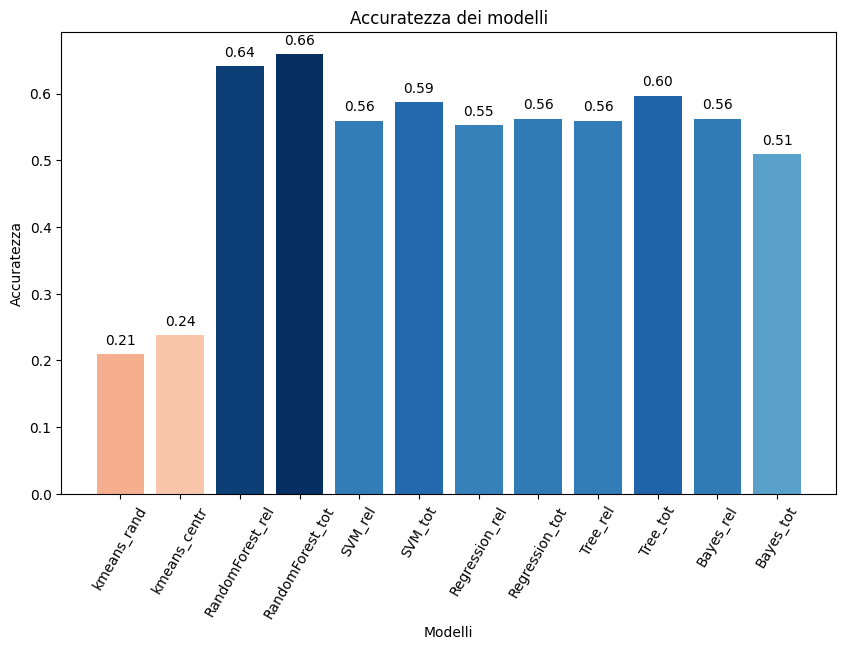

In [243]:
keys = list(accuracy_dict.keys())
values = list(accuracy_dict.values())
colors = plt.cm.RdBu(np.array(values) / max(values))  # Utilizza la mappa di colori "RdBu" in base ai valori massimi

plt.figure(figsize=(10, 6))
plt.bar(keys, values, color=colors)  # Specifica i colori per le barre

#Aggiungi valori sulle barplot
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.title('Accuratezza dei modelli')
plt.xlabel('Modelli')
plt.ylabel('Accuratezza')
plt.xticks(rotation=60)
plt.show()

## AS WE CAN SEE THE BEST MODEL TO CLASSIFY THE DATASET IS RANDOM FOREST WITH ALL THE FEATURE.